In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

Using TensorFlow backend.


In [0]:
#use seed to reproduce the results.
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

## Load the cifar dataset

In [3]:
#download data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#labels 0,1,8,9 --->  Transport
#labels 2,3,4,5,6,7 ----> Animals
#For training data combine the 10 classes to two classes,0 for transport and 1 for animals

y_train[np.where(np.isin(y_train,[0,1,8,9]))] = 0
y_train[np.where(np.isin(y_train,[2,3,4,5,6,7]))] = 1

#two classes labels
labels = ['Transport','Animal']


#For test data combine the 10 classes to two classes,0 for transport and 1 for animals
y_test[np.where(np.isin(y_test,[0,1,8,9]))] = 0
y_test[np.where(np.isin(y_test,[2,3,4,5,6,7]))] = 1

170500096/170498071 [==============================] - 11s 0us/step


## Normalize the inputs and reshape the labels

In [0]:
Y_input= tf.keras.utils.to_categorical(y_train[:50000])
X_input= (x_train[:50000]  / 255.0)


X_test= (x_test[:10000] /255.0)
Y_test= tf.keras.utils.to_categorical(y_test[:10000])

#Divide the training data to train data an validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_input, Y_input, test_size = 0.2)

## Creating the sequential model

In [6]:
# Initialize the model object
#Creating the sequential model
model = Sequential()

#Add two convolutional layers 64C3-P2 followed by pooling layer
model.add(Conv2D(filters=32, kernel_size=3,activation= 'relu',input_shape=(32,32,3),padding='same'))
model.add(Conv2D(filters=32, kernel_size=3,activation= 'relu',padding='same'))
model.add(MaxPool2D())

#Add 40% dropout
model.add(Dropout(0.4))


#Add two convolutional layers 64C3-P2 followed by pooling layer
model.add(Conv2D(filters=64, kernel_size=3,activation= 'relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,activation= 'relu',padding='same'))
model.add(MaxPool2D())

#Add 40% dropout
model.add(Dropout(0.4))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Add a dense layer with 64 units
model.add(Dense(64,activation= 'relu'))

#Add dropout
model.add(Dropout(0.4))

# Add an output layer for the two categories using softmax 
model.add(Dense(2,activation= 'softmax'))



W0719 01:18:25.298271 139993977952128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 01:18:25.302964 139993977952128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 01:18:25.314035 139993977952128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 01:18:25.363781 139993977952128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0719 01:18:25.368190 139993977952128 deprecation_wrapp

## Compilation and training


In [7]:
# compile the model
model.compile(optimizer= 'rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

W0719 01:18:25.518596 139993977952128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 01:18:25.546521 139993977952128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0719 01:18:25.555180 139993977952128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Use learning rate scheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [9]:
# train the model
model.fit(X_train, Y_train,validation_data = (X_val,Y_val), epochs=50, batch_size=128,callbacks=[annealer], verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 16s 396us/step - loss: 0.4161 - acc: 0.8151 - val_loss: 0.4612 - val_acc: 0.8202
Epoch 2/50
40000/40000 [==============================] - 10s 245us/step - loss: 0.2663 - acc: 0.8938 - val_loss: 0.2562 - val_acc: 0.8953
Epoch 3/50
40000/40000 [==============================] - 10s 245us/step - loss: 0.2293 - acc: 0.9118 - val_loss: 0.2356 - val_acc: 0.9060
Epoch 4/50
40000/40000 [==============================] - 10s 245us/step - loss: 0.2066 - acc: 0.9188 - val_loss: 0.2001 - val_acc: 0.9179
Epoch 5/50
40000/40000 [==============================] - 10s 244us/step - loss: 0.1919 - acc: 0.9266 - val_loss: 0.1758 - val_acc: 0.9304
Epoch 6/50
40000/40000 [==============================] - 10s 245us/step - loss: 0.1822 - acc: 0.9306 - val_loss: 0.1763 - val_acc: 0.9303
Epoch 7/50
40000/40000 [==============================] - 10s 244us/step - loss: 0.1704 - acc: 0.9346 - val_loss: 0.

##Assessing the accuracy

In [10]:
#Evaluate on test data 
model.evaluate(X_test, Y_test, batch_size= 128)

10000/10000 [==============================] - 1s 90us/step


[0.11430236555337905, 0.9603]

NameError: ignored

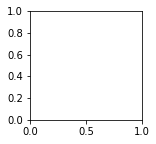

In [11]:
##Testing a single image
i=840

label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()